# LMS

Procesamiento Adaptativo de Señales Aleatorias

© 2018 Marc S. Ressl

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Este ejemplo representa la evolución y las curvas de aprendizaje de un filtro LMS, sus simulaciones Monte-Carlo, y la convergencia teórica.

Aplicamos el algoritmo LMS a un problema de predicción. Estimaremos el coeficiente a de un modelo autorregresivo de orden uno a través de un predictor de orden uno. Cuando el predictor converge, su coeficiente w tenderá a -a.

## Modelo IIR

In [2]:
# Parámetros del modelo IIR
sigma2v = 0.0186264
a = -0.99

def get_model_output(N):
    '''
    Calcula la salida de un sistema autorregresivo de orden uno
    '''
    # N_IIR es un margen que evita que el modelo de señal IIR tenga dependencias temporales
    N_IIR = 1000
    
    v = np.random.normal(0, np.sqrt(sigma2v), size=(N_IIR + N))
    u = signal.lfilter([1], [1, a], v)
    
    return u[N_IIR:]

## Implementación

In [3]:
def calc_lms_montecarlo(K, mu, N, w0):
    """
    Realiza una simulación de Monte-Carlo del algoritmo LMS
    aplicado a un problema de predicción lineal de orden uno.
    
    K: número de simulaciones de Monte-Carlo
    mu: parámetro de paso
    N: número de iteraciones
    w0: valor inicial del filtro adaptativo
    """
    
    # Simulación de Monte Carlo
    w_montecarlo = np.zeros((N, 1))
    J_montecarlo = np.zeros((N, 1))
    
    for i in range(K):
        u = get_model_output(N)
        
        # Predicción LMS
        w = np.zeros((N, 1))
        J = np.zeros((N, 1))
        w[0] = w0
        
        for n in range(1, N):
            y = w[n - 1] * u[n - 1]                 # Ecuación de filtrado
            d = u[n]
            e = d - y
            J[n - 1] = e * e
            w[n] = w[n - 1] + mu * u[n - 1] * e     # Ecuación LMS
            
        J[N - 1] = J[N - 2]
        
        w_montecarlo += w
        J_montecarlo += J
        
    w_montecarlo /= K
    J_montecarlo /= K
    
    return (w_montecarlo, J_montecarlo)

In [4]:
mu1 = 0.08
mu2 = 0.02
mu3 = 0.005
N = 2000
w0 = 0

## Convergencia de una realización de LMS

In [5]:
K = 1

w1, J1 = calc_lms_montecarlo(K, mu1, N, w0)
w2, J2 = calc_lms_montecarlo(K, mu2, N, w0)
w3, J3 = calc_lms_montecarlo(K, mu3, N, w0)

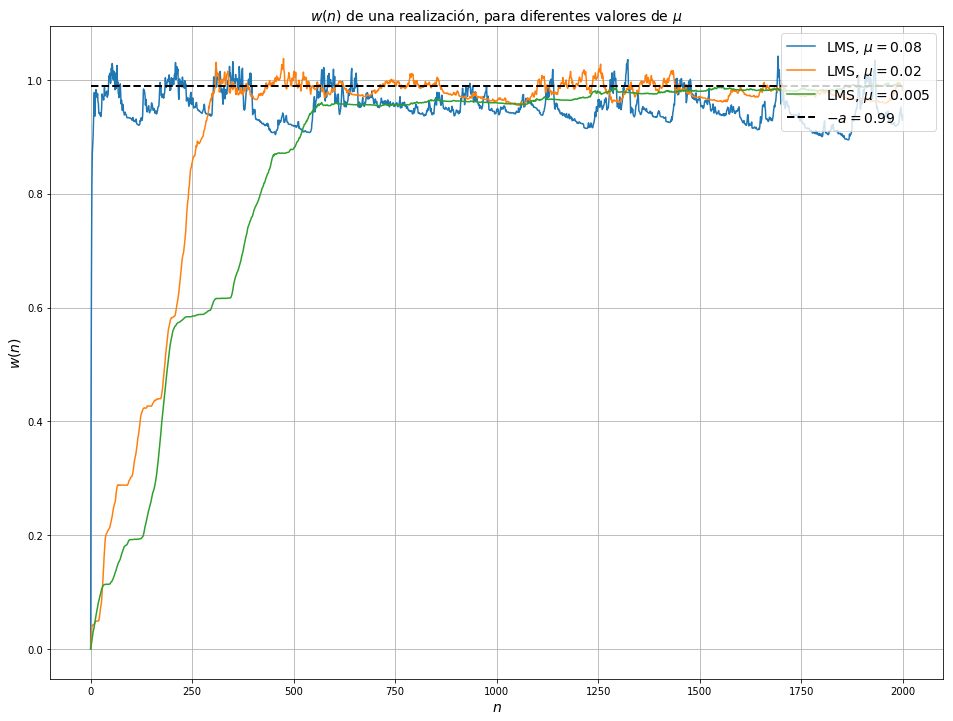

In [6]:
plt.figure(figsize=(16, 12))
plt.plot(w1, label='LMS, $µ=%s$' % mu1)
plt.plot(w2, label='LMS, $µ=%s$' % mu2)
plt.plot(w3, label='LMS, $µ=%s$' % mu3)
plt.plot([0, len(w1) - 1], [-a, -a], color='k', linestyle='--', linewidth=2, label='$-a=%s$' % -a)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$w(n)$', fontsize=14)
plt.grid(True)
plt.title('$w(n)$ de una realización, para diferentes valores de $µ$', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

* Se observa que conforme disminuye µ, disminuye la velocidad de convergencia, pero también disminuye el desajuste.

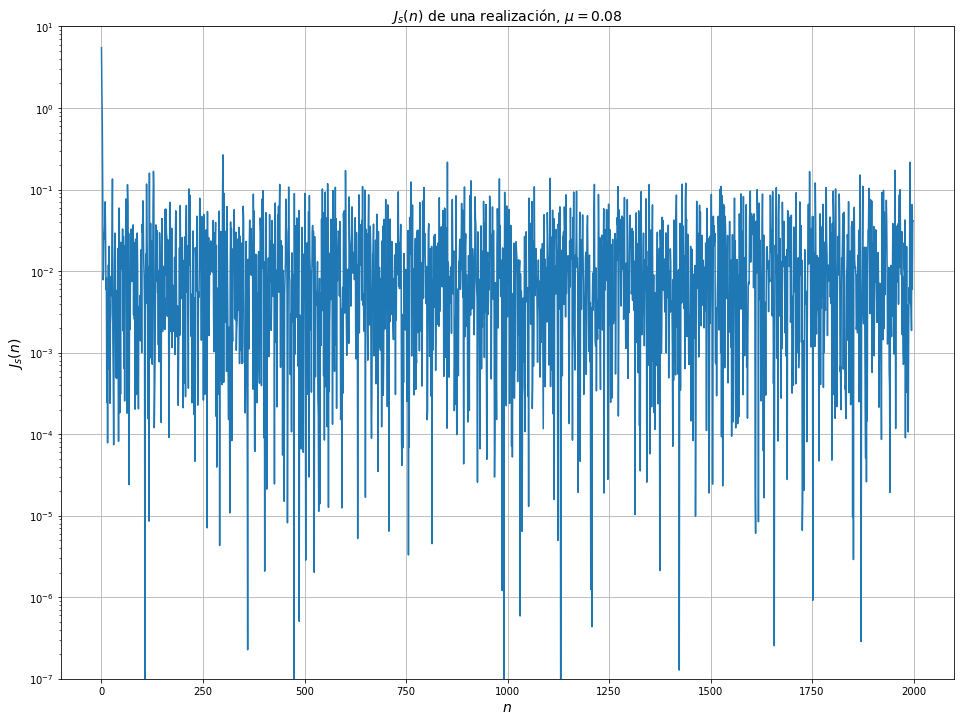

In [7]:
plt.figure(figsize=(16, 12))
plt.semilogy(J1)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.title('$J_s(n)$ de una realización, $µ=%s$' % mu1, fontsize=14)
plt.show()

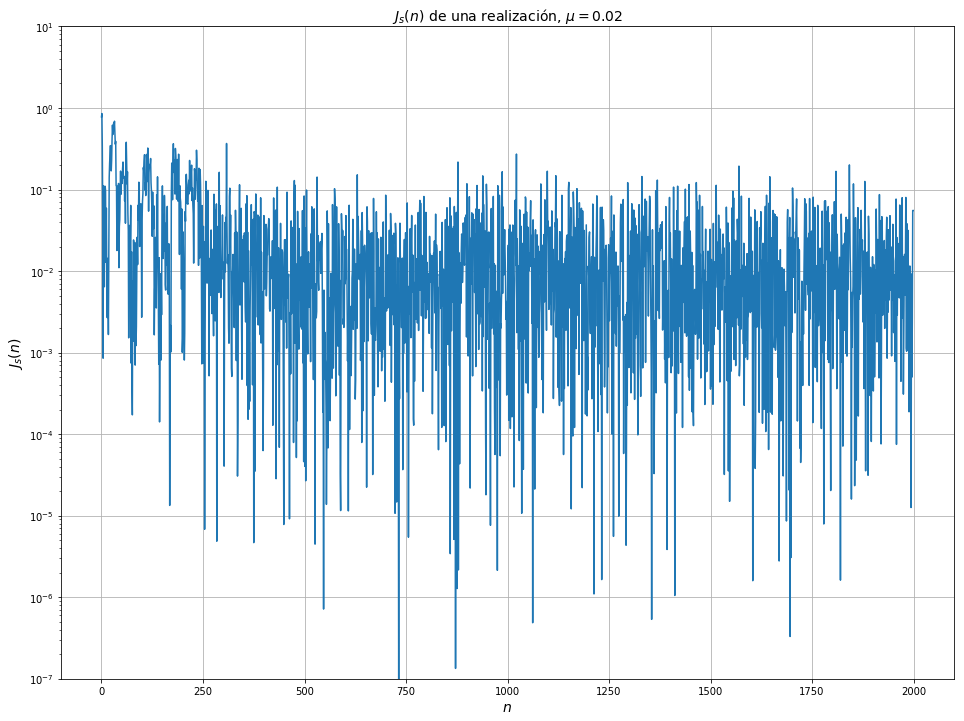

In [8]:
plt.figure(figsize=(16, 12))
plt.semilogy( J2)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.title('$J_s(n)$ de una realización, $µ=%s$' % mu2, fontsize=14)
plt.show()

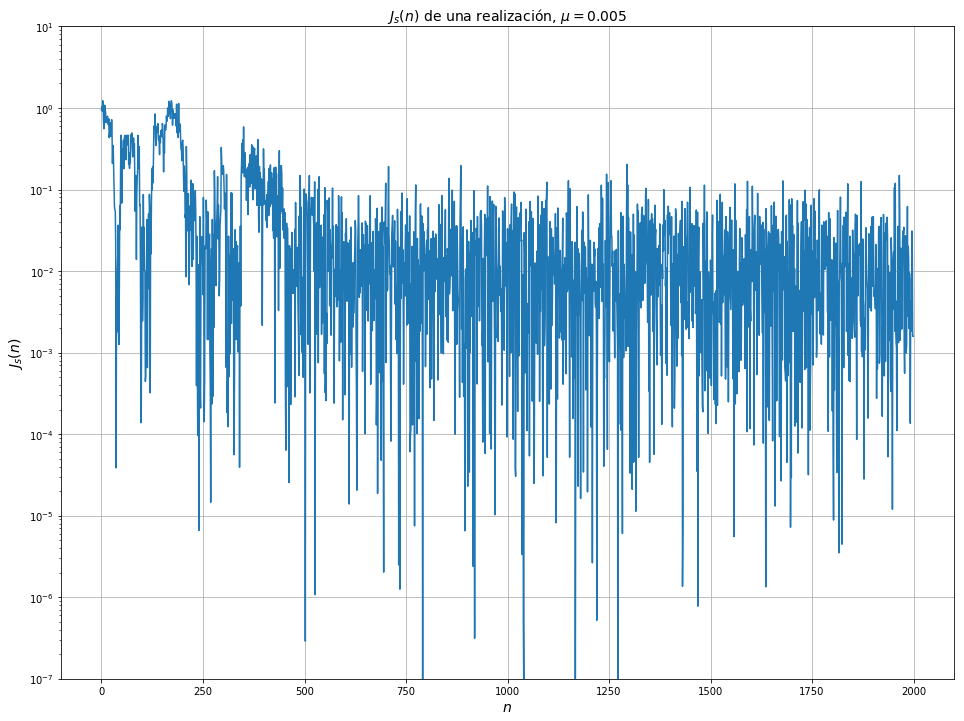

In [9]:
plt.figure(figsize=(16, 12))
plt.semilogy(J3)
plt.xlabel('$n$', fontsize=14)
plt.ylim(1e-7, 1e1)
plt.ylabel('$J_s(n)$', fontsize=14)
plt.grid(True)
plt.title('$J_s(n)$ de una realización, $µ=%s$' % mu3, fontsize=14)
plt.show()

* Se observa como el error cuadrático medio de una realización es una medida muy ruidosa del comportamiento del sistema.

## Convergencia media con simulación de Monte-Carlo

¡Cuidado! Debido a que se calculan 10000 realizaciones para cada simulación, el siguiente paso tarda varios minutos. Es posible disminuir el valor de K para obtener una estimación más rápida, pero más ruidosa.

In [10]:
K = 10000

w1_mc, J1_mc = calc_lms_montecarlo(K, mu1, N, w0)
w2_mc, J2_mc = calc_lms_montecarlo(K, mu2, N, w0)
w3_mc, J3_mc = calc_lms_montecarlo(K, mu3, N, w0)

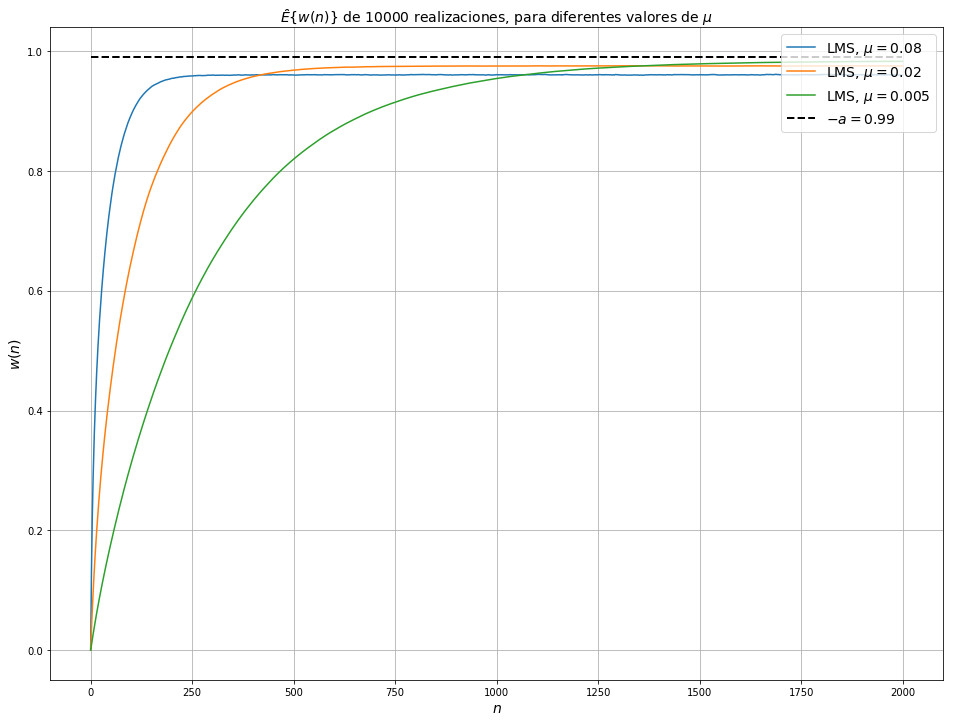

In [11]:
plt.figure(figsize=(16, 12))
plt.plot(w1_mc, label='LMS, $µ=%s$' % mu1)
plt.plot(w2_mc, label='LMS, $µ=%s$' % mu2)
plt.plot(w3_mc, label='LMS, $µ=%s$' % mu3)
plt.plot([0, len(J1_mc) - 1], [-a, -a], color='k', linestyle='--', linewidth=2, label='$-a=%s$' % -a)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$w(n)$', fontsize=14)
plt.title('$Ȇ\{w(n)\}$ de %s realizaciones, para diferentes valores de $µ$' % K, fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.show()

* El algoritmo LMS no siempre converge (en la media) al valor verdadero de -a: esto ocurre cuando µ no es chico. Conforme µ se hace más pequeño, el error disminuye.

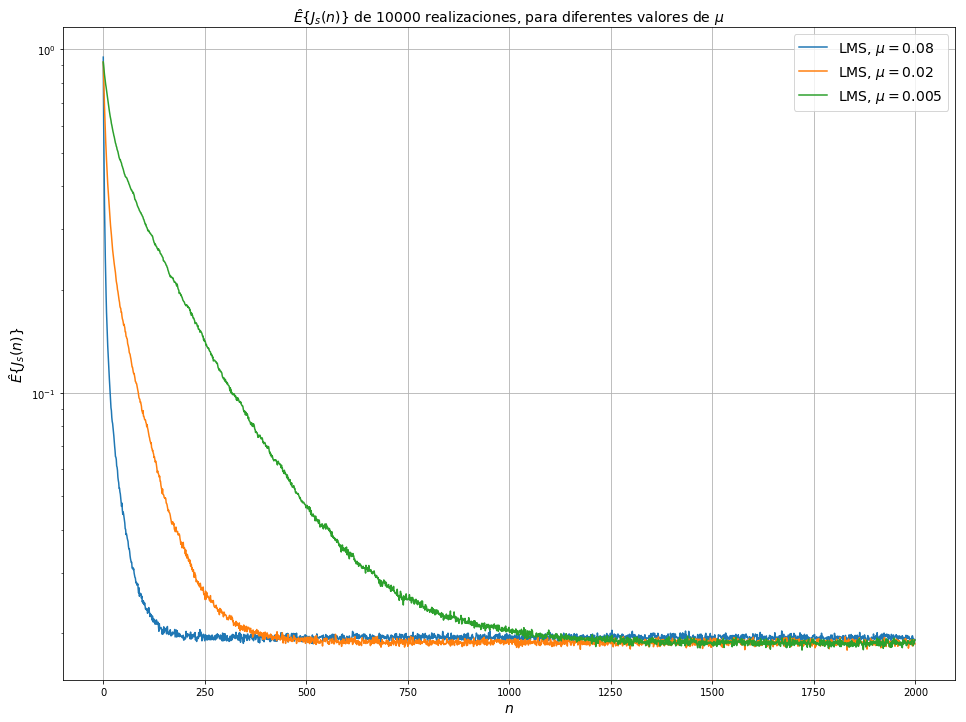

In [12]:
plt.figure(figsize=(16, 12))
plt.semilogy(J1_mc, label='LMS, $µ=%s$' % mu1)
plt.semilogy(J2_mc, label='LMS, $µ=%s$' % mu2)
plt.semilogy(J3_mc, label='LMS, $µ=%s$' % mu3)
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$Ȇ\{J_s(n)\}$', fontsize=14)
plt.grid(True)
plt.title('$Ȇ\{J_s(n)\}$ de %s realizaciones, para diferentes valores de $µ$' % K, fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Se observa que conforme disminuye el valor de µ, disminuye la velocidad de convergencia, pero disminuye también el desajuste: en régimen estacionario, la curva para µ=0.005 tiene un error cuadrático medio ligeramente inferior a la curva para µ=0.8.

## Comparación entre Ȇ{J<sub>s</sub>(n)} y el valor teórico J(n)

In [13]:
def get_sigma2u(sigma2v, a):
    '''
    Calcula la energía de salida del modelo IIR
    '''
    return sigma2v / (1.0 - a * a)


def calc_theoretical_jn(sigma2v, a, mu, N):
    '''
    Determina el valor teórico de J(n)
    '''
    sigma2u = get_sigma2u(sigma2v, a)

    J = np.zeros((N, 1));
    for n in range(N):
        J[n] = sigma2v * (1.0 + 0.5 * mu * sigma2u) + \
            sigma2u * (a * a - 0.5 * mu * sigma2v) * \
            ((1 - mu * sigma2u) ** (2 * n))
    
    return J

In [14]:
mu = 0.001
N = 10000
w0 = 0

In [15]:
K = 10000

w4_mc, J4_mc = calc_lms_montecarlo(K, mu, N, w0)
J4_t = calc_theoretical_jn(sigma2v, a, mu, N)

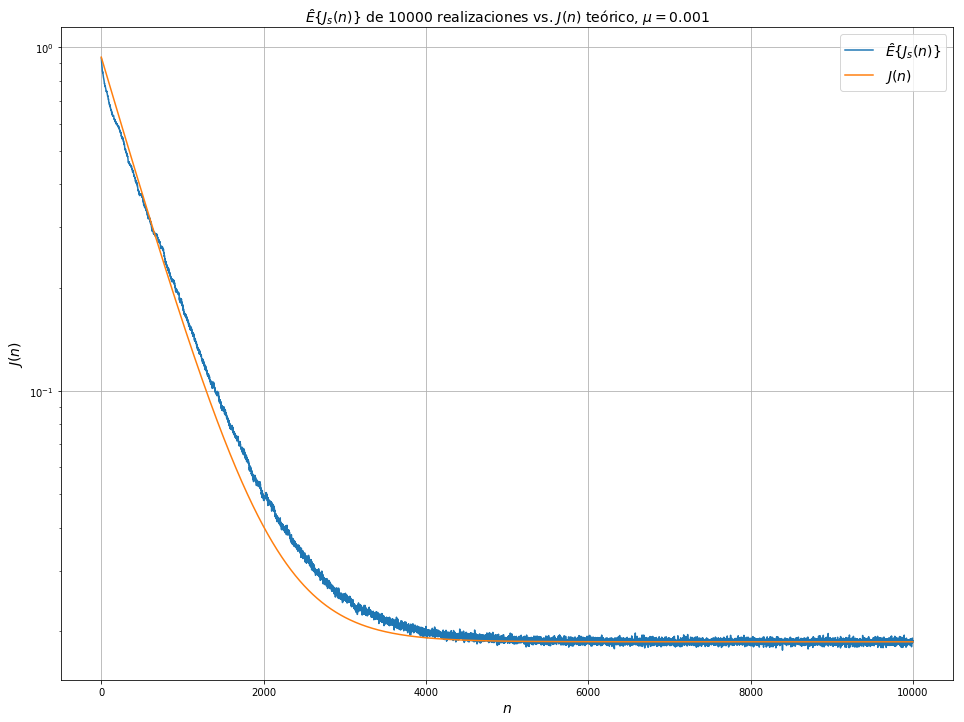

In [16]:
plt.figure(figsize=(16, 12))
plt.semilogy(J4_mc, label='$Ȇ\{J_s(n)\}$')
plt.semilogy(J4_t, label='$J(n)$')
plt.xlabel('$n$', fontsize=14)
plt.ylabel('$J(n)$', fontsize=14)
plt.grid(True)
plt.title('$Ȇ\{J_s(n)\}$ de %s realizaciones vs. $J(n)$ teórico, $µ=%s$' % (K, mu), fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

* Hay buena correspondencia entre la teoría y la práctica.
* Las diferencias se deben a que µ no es pequeño.